# CUSTOMER SEGMENTATION

### LATAR BELAKANG
Perusahaan yang sukses saat ini adalah perusahaan yang mengenal baik karakteristik pelanggannya sehingga mereka mampu menyediakan produk yang sesuai dengan kebutuhan pelanggannya. Hal ini dapat dicapai jika kita dapat mengelompokkan pelanggan ke dalam kelompok yang berbeda berdasarkan kesamaan dari karakter mereka.

Tujuan dari segmentasi ini adalah untuk melihat kebutuhan pelanggan, mengenal minat, gaya hidup, prioritas dan mempelajari kebiasaan belanja mereka sehingga dapat memaksimalkan nilai pelanggan bagi bisnis.

### PERNYATAAN MASALAH
Dari dataset yang sudah di berikan, kita akan mencoba menjawab beberapa pertanyaan seputar prospek kedepannya agar perusahaan bisa lebih baik lagi. Pertanyaan tersebut diantaranya adalah:
1. Bagaimana karakteristik pelanggan?
2. Bagaimana kebiasaan berbelanja pelanggan?
3. Apakah ada produk dari perusahaan yang membutuhkan lebih banyak pemasaran?
4. Bagaimana pemasaran yang efektif untuk perusahaan?

In [2]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('marketing_campaign.csv',header=0,sep=';')

Dataset ini berisi informasi customer, produk perusahaan, campaign perusahaan dan melalui apa customer mendapatkan barangnya. Berikut kolomnnya:

People

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years

Promotion

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

    NumWebPurchases: Number of purchases made through the company’s website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month


### DATA PROCESSING

In [3]:
data=pd.read_csv('marketing_campaign.csv',sep='\t')
display(data.head(),data.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [4]:
print(f'Jumlah baris dan kolom di dataset data adalah {data.shape}')
data.info()

Jumlah baris dan kolom di dataset data adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-n

In [5]:
pd.set_option('display.max_columns', None)
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [6]:
# Descriptive Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in data.columns :
    listItem.append( [col, data[col].nunique(), data[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

In [8]:
data.isna().sum()/data.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [9]:
missing_values = data.isna().sum()
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

fig = px.bar(missing_values_df,
       x = 'Column',
       y = 'Missing_Values',
       template = 'plotly_dark',
       title = 'Missing Values')
fig.show()

Observasi:
- Terdapat missing value pada kolom `Income` sebesar 1.07%
- Kolom `Z_Revenue` dan `Z_CostContact` memiliki nilai konstan yang dimana tidak berpengaruh dalam modeling
- `Marital_Status` dapat kita jadikan kategorikal variabel
- Tipe data `Dt_Customer` masih object dan akan di ganti menjadi Datetime


In [10]:
# Drop missing value pada kolom income
data.dropna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


Kita sudah drop missing value sehingga barisnya menjadi 2216 dari 2240 baris

In [11]:
# mengganti format dari object ke datetime
data["Dt_Customer"]= pd.to_datetime(data["Dt_Customer"])

In [12]:
# drop data yang tidak di perlukan karena memiliki nilai yg sama dan tidak berpengaruh terhadap modeling
data= data.drop(columns=['Z_CostContact', 'Z_Revenue'],axis=1)
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [13]:
# Pengecekan apakah ada data yg terduplikasi
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

Tidak ada data duplikasi dalam dataset

Setelah di observasi datanya, para customer mendaftarkan diri ID pelanggannya ke perusahaan dari tahun 2012-2014. Saya akan berasumsi bahwa data ini diambil pada tahun 2015.
Kita akan menghitung setiap umur customer berdasarkan tahun kelahiran mereka

In [14]:
# Menambahkan kolom Age
data['Age']= 2015 - data.Year_Birth
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34


Dari tanggal pendaftaran, kita akan menghitung berapa bulan pelanggan telah berafiliasi dengan perusahaan

In [15]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Month_Customer'] = 12.0 * (2015 - data.Dt_Customer.dt.year ) + (1 - data.Dt_Customer.dt.month)

Dalam database tersebut, pengeluaran customer di tampilkan secara terpisah berdasarkan produk yg berbeda sehingga kita akan menghitung total keseluruhan pengeluaran customer terlebih dahulu

In [16]:
data['Total_Spendings'] =  data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds


Berdasarkan kolom Age yang sudah kita tambahkan tadi, kita akan membagi pelanggan menjadi beberapa umur grup

In [17]:
data.loc[(data['Age'] >= 13) & (data['Age'] <= 19), 'Age_Group'] = 'Teen'
data.loc[(data['Age'] >= 20) & (data['Age']<= 39), 'Age_Group'] = 'Adult'
data.loc[(data['Age'] >= 40) & (data['Age'] <= 59), 'Age_Group'] = 'Middle Age Adult'
data.loc[(data['Age'] > 60), 'Age_Group'] = 'Senior Adult'


Informasi mengenai anak dan remaja yang ada di rumah di tampilkan secara terpisah, maka kita akan menggabungkan mereka karena akan lebih baik jika di representasikan bersama menjadi jumlah anak dirumah

In [18]:
data['Children'] = data['Kidhome'] + data['Teenhome']

Kolom `Marital_Status` memiliki nilai yang berbeda, namun nilai tersebut memiliki kategori yang sama. Jadi kita akan membaginya menjadi 2 kategori utama yaitu Single dan In Relationship

In [19]:
data.Marital_Status = data.Marital_Status.replace({'Together': 'In Relationship',
                                                           'Married': 'In Relationship',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Month_Customer,Total_Spendings,Age_Group,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,33.0,1617,Middle Age Adult,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,5.0,27,Senior Adult,2
2,4141,1965,Graduation,In Relationship,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,17.0,776,Middle Age Adult,0
3,6182,1984,Graduation,In Relationship,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31,3.0,53,Adult,1
4,5324,1981,PhD,In Relationship,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34,12.0,422,Adult,1


Jika dilihat databasenya, sepertinya terdapat outliers pada `Income` dan `Age`. Maka dari itu kita akan melakukan pengecekan

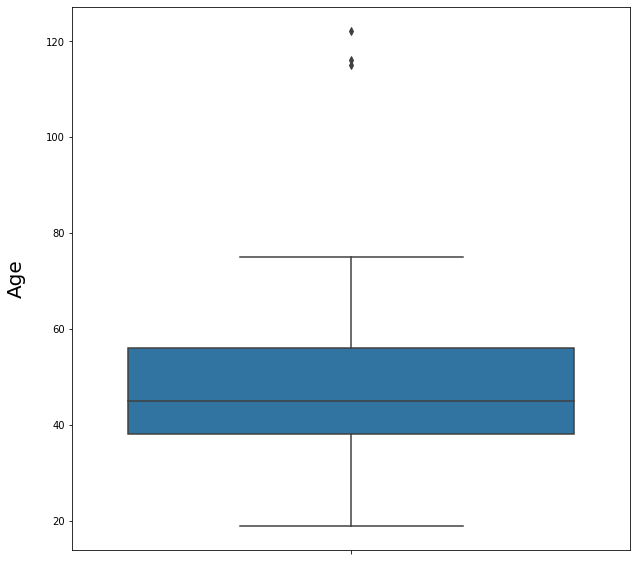

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data.Age);
plt.ylabel('Age', fontsize=20, labelpad=20);

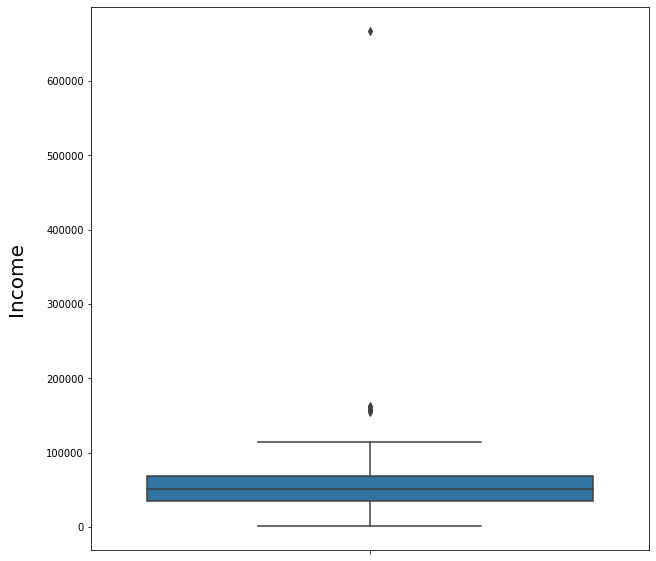

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data.Income);
plt.ylabel('Income', fontsize=20, labelpad=20);

Insights:
- Terdapat customer yang umurnya diatas 100 tahun dimana itu sangat jarang terjadi
- Terdapat pelanggan yang penghasilannya diatas 120.000 dollar dan bahkan ada yang di atas 600.000 dollar. Kita akan tinggalkan saja outlier yang ada di data penghasilan ini

In [22]:
# Kita hanya menampilkan data yg umurnya dibawah 100 tahun dan penghasilannya dibawah 120.000 dollar
customer = data[data.Age < 100]
customer = data[data.Income < 120000]
customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Month_Customer,Total_Spendings,Age_Group,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,33.0,1617,Middle Age Adult,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,5.0,27,Senior Adult,2
2,4141,1965,Graduation,In Relationship,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,17.0,776,Middle Age Adult,0
3,6182,1984,Graduation,In Relationship,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31,3.0,53,Adult,1
4,5324,1981,PhD,In Relationship,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34,12.0,422,Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,In Relationship,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,48,19.0,1341,Middle Age Adult,1
2236,4001,1946,PhD,In Relationship,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,69,3.0,444,Senior Adult,3
2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,34,12.0,1241,Adult,0
2238,8235,1956,Master,In Relationship,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,59,12.0,843,Middle Age Adult,1


### DATA ANALYSIS

#### Marital Status

In [23]:
# Visualisasi presentase antara customer yang memiliki pasangan dan yang tidak punya pasangan
maritalstatus = customer.Marital_Status.value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=['black','purple'])
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 5)))
fig.show()

Insight:
- Lebih dari 50% customer hidup bersama dengan pasangannya

#### Total Spending

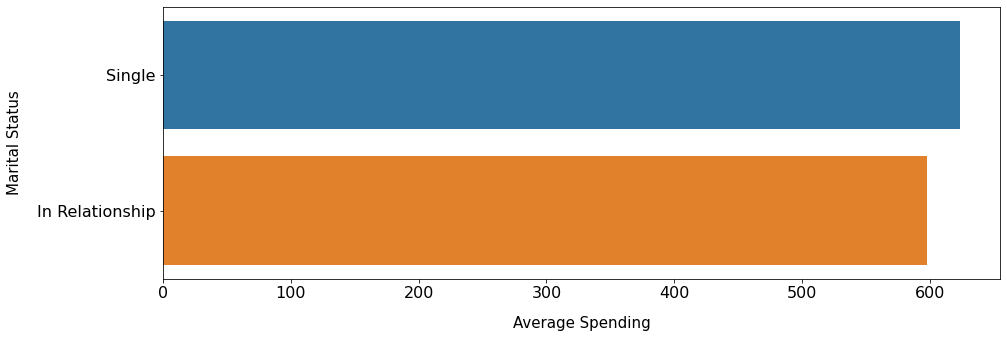

In [24]:
# Visualisasi rata-rata pengeluaran antara customer yang memiliki pasangan dan yang tidak punya pasangan
maritalspending = customer.groupby('Marital_Status')['Total_Spendings'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(15,5))
sns.barplot(data = maritalspending_df, x="Average Spending", y="Marital Status");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=15, labelpad=15)
plt.ylabel('Marital Status', fontsize=15, labelpad=15);

Insights:
- Dari data di atas kita dapat menyimpulkan bahwa customer yang berstatus Single lebih banyak pengeluarannya dibandingkan dengan customer yang memiliki pasangan

#### Customer Background Education

In [25]:
education = customer.Education.value_counts()

fig = px.pie(education, 
             values = education.values, 
             names = education.index,
             color_discrete_sequence= ['maroon','gold','green','cyan','purple'])
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'black', width = 2)))
fig.show()

Insights:
- Setengah dari customer telah lulus dari Universitas
- Customer lebih banyak mengambil gelar PhD dibandingkan Master

#### Child Status

In [26]:
children = customer.Children.value_counts()

fig = px.pie(children, 
             values = children.values, 
             names = children.index,
             color_discrete_sequence=['maroon','gold','green','cyan',])
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'black', width = 2)))
fig.show()

Insights:
- 50% dari pelanggan memiliki satu anak saja
- lebih besar presentase customer yang tidak memiliki anak dibanding yang memiliki 2 dan 3 anak

Setelah kita memvisualisasikan total pengeluaran customer yang Single dan In Relationship di atas, sekarang kita akan memvisualisasikan total pengeluaran customer yang tidak memiliki anak dan memiliki anak

#### Total Spendings : Jumlah Anak

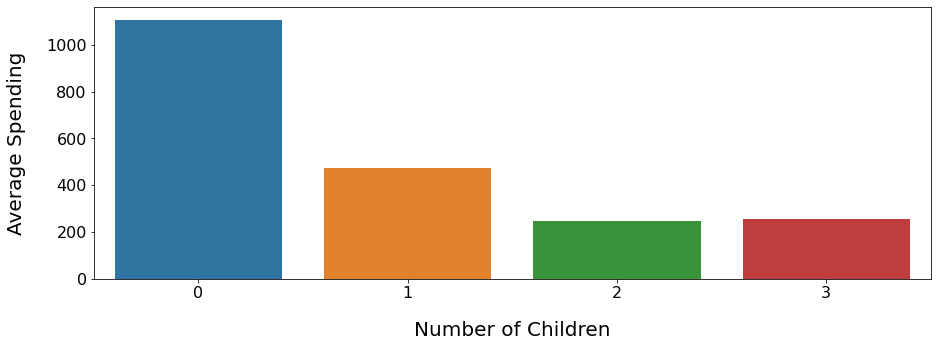

In [27]:
childrenspending = customer.groupby('Children')['Total_Spendings'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['Number of Children', 'Average Spending'])

plt.figure(figsize=(15,5))

sns.barplot(data=childrenspending_df,  x="Number of Children", y="Average Spending");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Number of Children', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

Insights:
- Customer yang tidak memiliki anak ternyata pengeluarannya paling besar diantara customer yg memiliki anak
- Customer yang memiliki 1 anak pengeluarannya lebih besar dibandingkan dengan yang memiliki 2 dan 3 anak

#### Distribusi Umur Customer

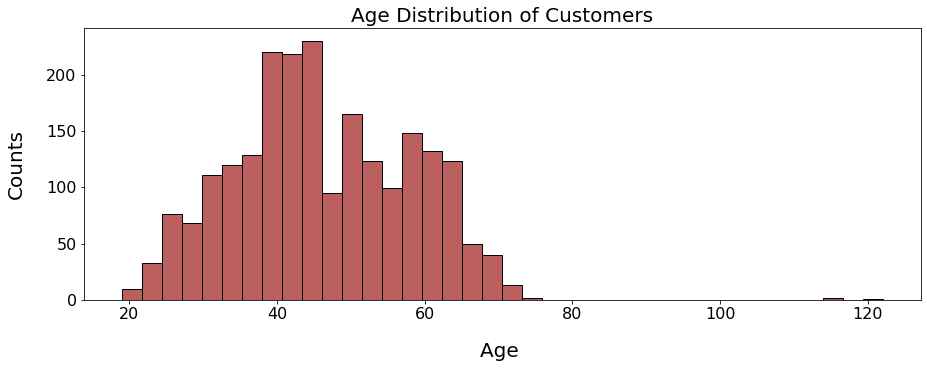

In [28]:
plt.figure(figsize=(15,5))
age_customer = sns.histplot(data = customer.Age, color='brown')
plt.title("Age Distribution of Customers", size= 20);
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age ', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

Insights:
- Menurut histogram diatas bahwa Umur customer distribusinya normal, dan mayoritas umur para customer di antara 40 dan 60 tahun

#### Korelasi Age dan Total Spendings

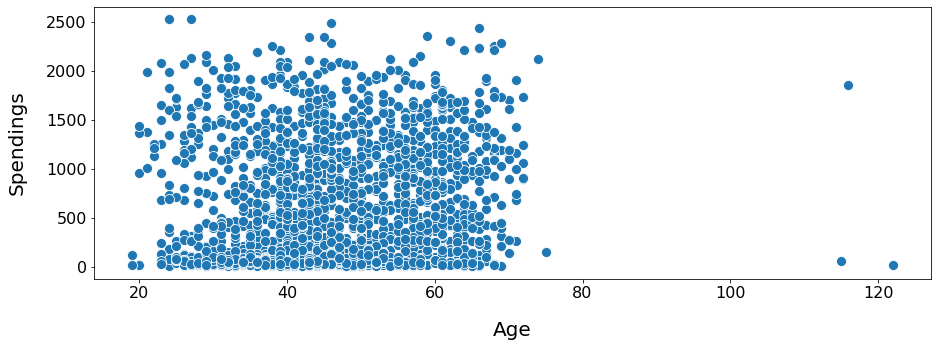

In [29]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=customer.Age, y=customer.Total_Spendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

Insights:
- Tidak ada hubungan kuat antara Umur customer dengan kebiasaan belanja customer

#### Segmentasi Customer : Klasifikasi Umur

In [30]:
agegroup = customer.Age_Group.value_counts()

fig = px.pie(labels = agegroup.index, values = agegroup.values, names = agegroup.index, width = 550, height = 550)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.50, 
                  marker = dict(colors = ['black', 'purple', 'green'], 
                                line = dict(color = 'white', width = 3)))

fig.update_layout(annotations = [dict(text = 'Age Groups', 
                                      x = 0.5, y = 0.5, font_size = 25, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

Insights:
- Mayoritas Customer dari perusahaan tersebut merupakan Middle Age Adult yang dimana umurnya 40 sampai 60 tahun
- Sedangkan jumlah Customer yang berada di grup Senior Adult tidak sampai setengah dari jumlah Customer grup Middle Age Adult

#### Total Spending : Kelompok Umur

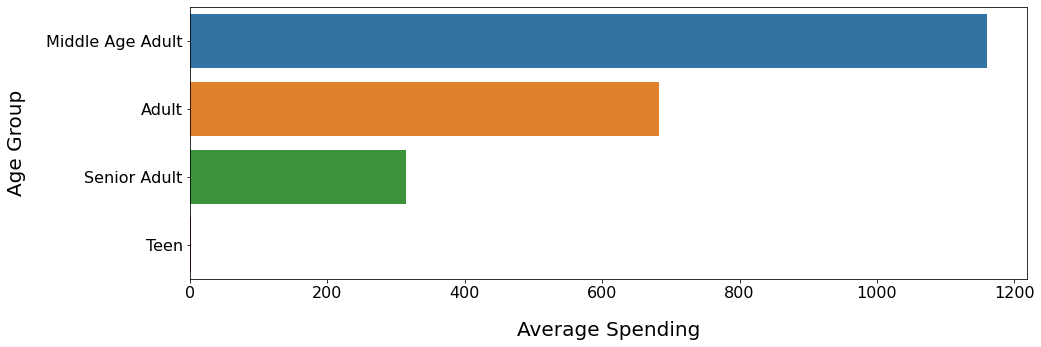

In [31]:
agegroupspending = customer.groupby('Age_Group')['Total_Spendings'].mean().sort_values(ascending=False)
agegroupspending_df = pd.DataFrame(list(agegroup.items()), columns=['Age Group', 'Average Spending'])

plt.figure(figsize=(15,5))

sns.barplot(data = agegroupspending_df, x="Average Spending", y='Age Group');
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Age Group', fontsize=20, labelpad=20);

Insights:
- Kelompok Middle Age Adult(40 sampai 60 tahun) memiliki rata-rata pengeluaran terbanyak dari kelompok lainnya
- Kelompok Teen (< 19 tahun) sama sekali tidak ada pengeluaran 

#### Distribusi Income Customer

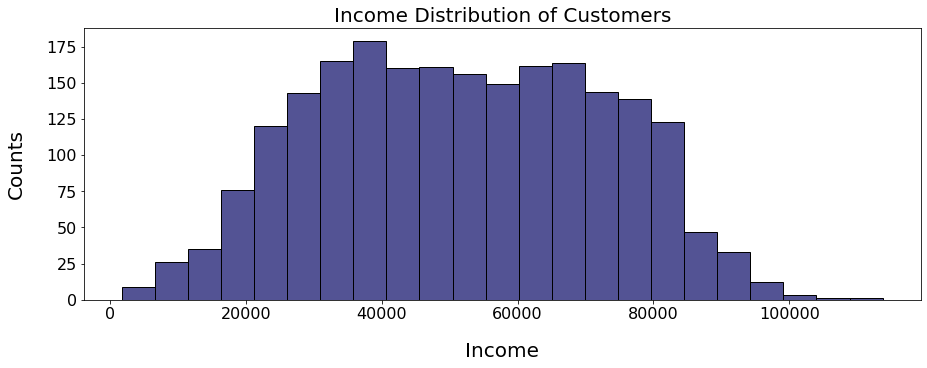

In [32]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(data = customer.Income, color = "midnightblue")
plt.title ("Income Distribution of Customers", size= 20);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

Insights:
- Pendapatan Customer memiliki distribusi normal dimana mayoritas customer pendapatannya sebesar 20.000 sampai 85.000

#### Korelasi Income dan Total Spendings

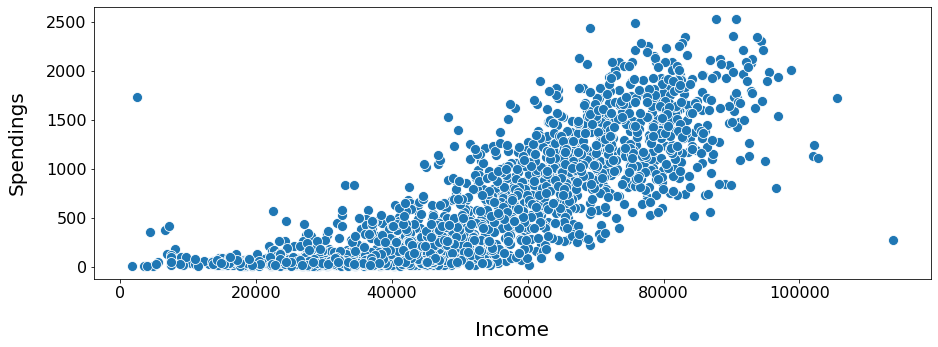

In [33]:
plt.figure(figsize=(15,5))


sns.scatterplot(x=customer.Income, y=customer.Total_Spendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

Insights:
- Dari grafik diatas kita bisa menyimpulkan bahwa terdapat korelasi positif antara Income dengan Total Spendings, dimana semakin besar Income yang di dapat maka akan semakin besar juga pengeluaran customer terhadapt produk perusahaan

#### Produk yang paling banyak dibeli

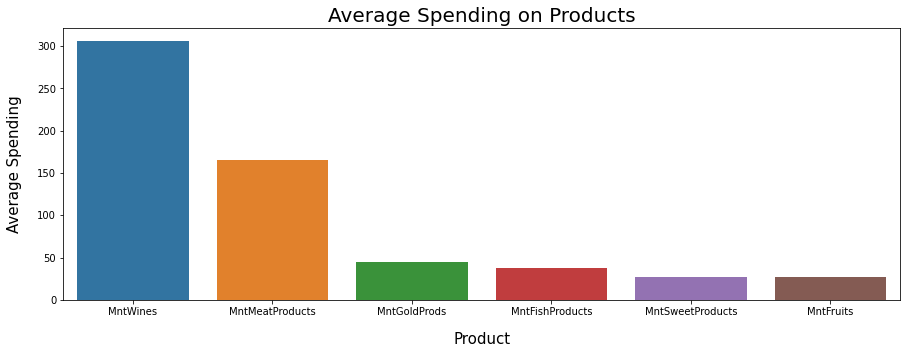

In [34]:
products = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(15,5))
plt.title('Average Spending on Products', size=20)
sns.barplot(data=product_means_df, x='Product', y='Average Spending');
plt.xlabel('Product', fontsize=15, labelpad=15)
plt.ylabel('Average Spending', fontsize=15, labelpad=15);

Insights:
- Customer lebih banyak melakukan pembelian terhadap Wine dan Meat
- Untuk produk Sweet dan Fruits jarang di beli Customer

### CLUSTERING

Kita akan mencari tahu perbedaan segmentasi pelanggan berdasarkan data pelanggan menggunakan K-means Cluster. Pertama kita akan drop kolom yang tidak di perlukan agar lebih simple dalam proses modeling

In [35]:
data_new = customer.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer',
                         'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'Age_Group'], axis=1)
data_new

,Income,Age,Month_Customer,Total_Spendings,Children
0,58138.0,58,33.0,1617,0
1,46344.0,61,5.0,27,2
2,71613.0,50,17.0,776,0
3,26646.0,31,3.0,53,1
4,58293.0,34,12.0,422,1
...,...,...,...,...,...
2235,61223.0,48,19.0,1341,1
2236,64014.0,69,3.0,444,3
2237,56981.0,34,12.0,1241,0
2238,69245.0,59,12.0,843,1


Kita akan memilih nomor cluster menggunakan Elbow Method

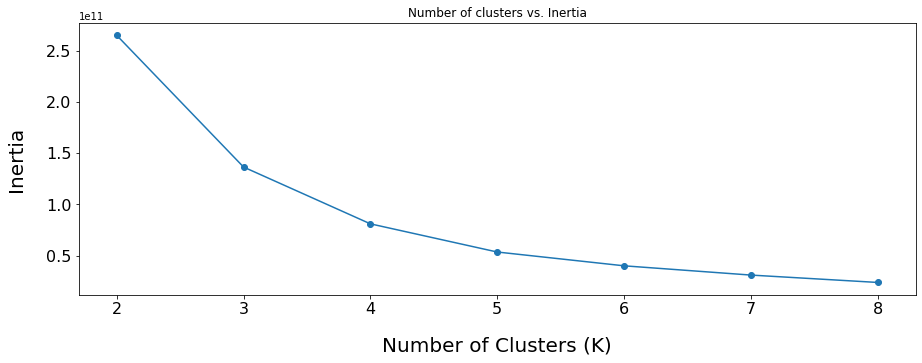

In [36]:

range_cluster = range(2,9)
inertias = []

for n_clusters in range_cluster :
    model = KMeans(n_clusters, random_state=42).fit(data_new)
    inertias.append(model.inertia_)

plt.figure(figsize=(15,5))    
plt.title("Number of clusters vs. Inertia")
plt.plot(range_cluster, inertias, '-o')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20);

Insights:
- Berdasarkan plot di atas kita akan membagi customer menjadi 4 cluster karena penurunan nilai dari Inertia tidak signifikan

In [37]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(data_new)

preds = model.predict(data_new)

customer_kmeans = data_new.copy()
customer_kmeans['clusters'] = preds


#### Indentifikasi Cluster

Kita akan mengidentifikasi 4 model cluster berdasarkan fitur data yang berbeda

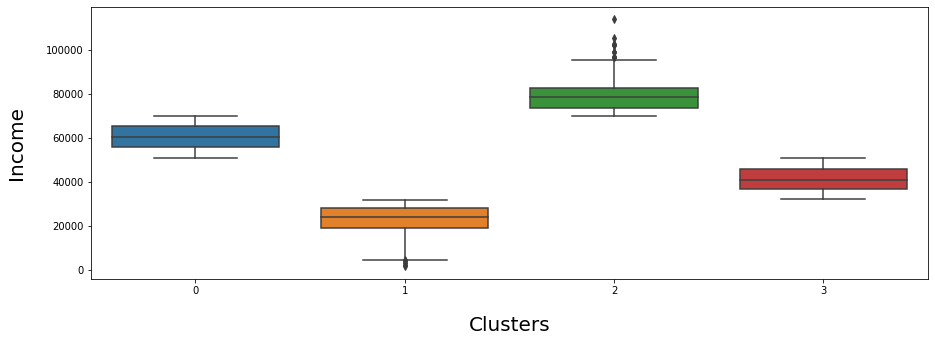

In [38]:
plt.figure(figsize=(15,5))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20);

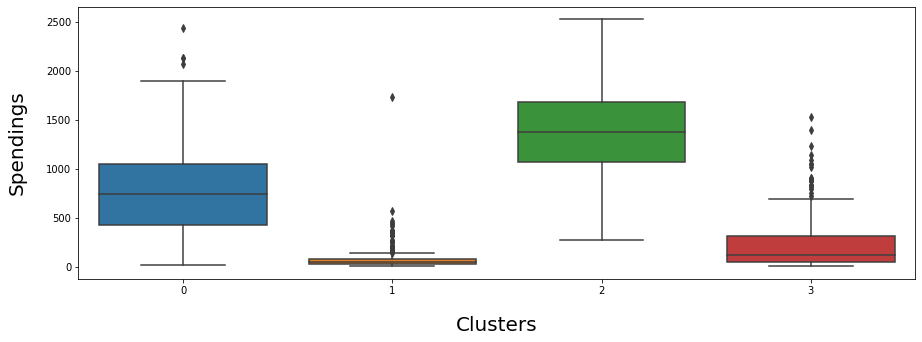

In [39]:
plt.figure(figsize=(15,5))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Total_Spendings');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

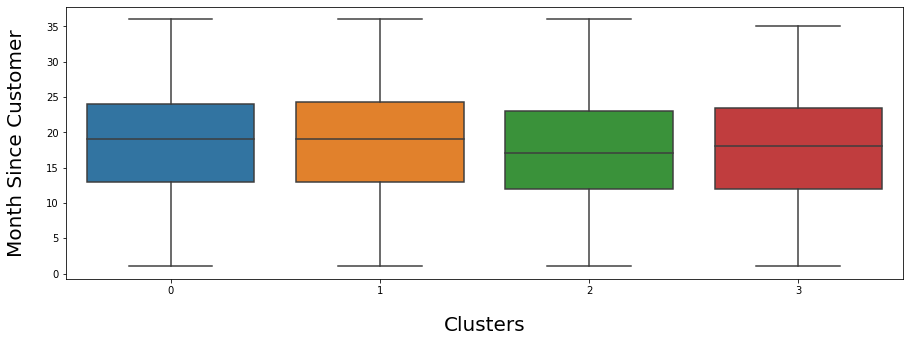

In [40]:
plt.figure(figsize=(15,5))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Month_Customer');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Month Since Customer', fontsize=20, labelpad=20);

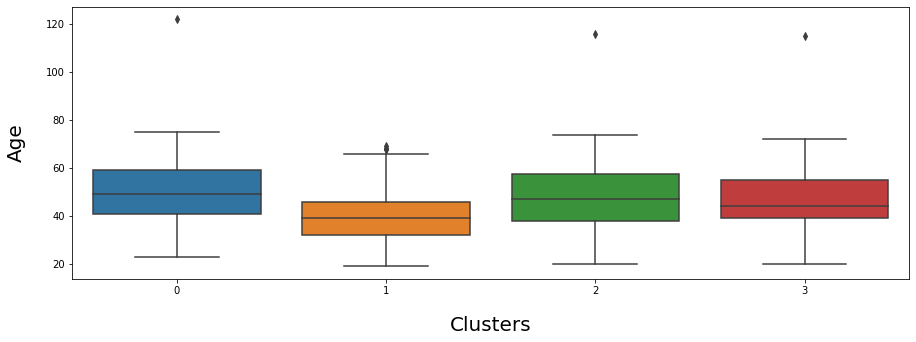

In [41]:
plt.figure(figsize=(15,5))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Age');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=20, labelpad=20);

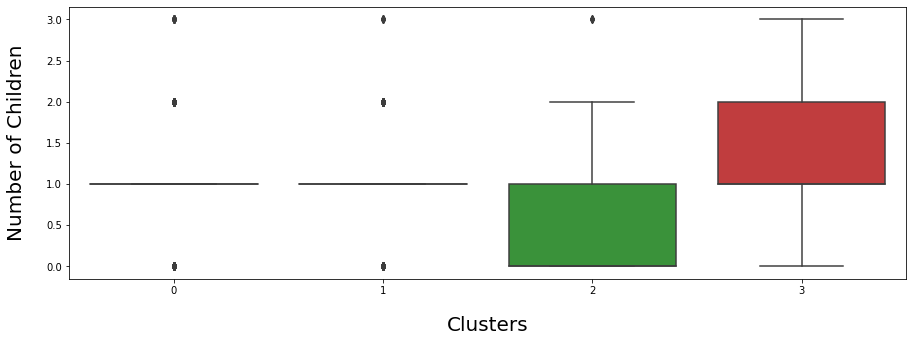

In [42]:
plt.figure(figsize=(15,5))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Children');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Number of Children', fontsize=20, labelpad=20);

#### Interpretasi Cluster

Dari analisis diatas kita dapat mengelompokan customer menjadi 4 grup berdasarkan income dan total pengeluaran mereka:
- Platinum : Customer dengan pendapatan dan pengeluaran tertinggi
- Gold : Customer dengan pendapatan dan pengeluaran yang tinggi
- Silver : Customer dengan pendapatan dan pengeluaran yang rendah
- Bronze : Customer dengan pendapatan dan pengeluaran terendah

Selanjutnya kita akan explore model cluster di atas untuk mengidentifikasi kebiasaan belanja customer

In [43]:
customer_kmeans.clusters = customer_kmeans.clusters.replace({1: 'Bronze',
                                                             2: 'Platinum',
                                                             3: 'Silver',
                                                             0: 'Gold'})

customer['clusters'] = customer_kmeans.clusters

In [44]:
cluster_counts = customer.clusters.value_counts()

fig = px.pie(cluster_counts, 
             values = cluster_counts.values, 
             names = cluster_counts.index,
             color_discrete_sequence=['grey','gold','green','chocolate'])
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

Insights:
- Sebagian besar customer berada di kategori Silver dan Gold dengan presentase masing-masing 29% dan 27%
- Jumlah customer setiap cluster hampir merata,perbedaannya tidak terlalu signifikan

#### Korelasi Income dengan Total Pengeluaran tiap Cluster

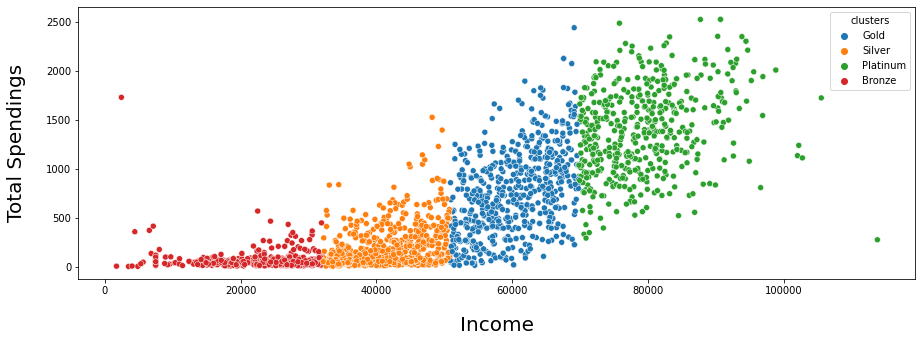

In [45]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=customer, x='Income', y='Total_Spendings', hue='clusters');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

Insights:
- Korelasi antara Income dengan Total Pengeluaran adalah positif dimana semakin besar pendapatan customer, maka akan semakin besar juga pengeluarannya

#### Kebiasaan Belanja Setiap Cluster

<Figure size 3600x3600 with 0 Axes>

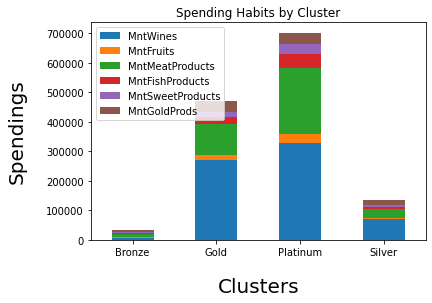

In [46]:
cluster_spendings = customer.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(50,50))
cluster_spendings.plot(kind='bar', stacked=True)
plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

Insights:
- Semua pelanggan dari tiap cluster pengeluarannya lebih banyak di alokasikan keproduk Wines dan Meat
- Total pengeluaran cluster Bronze tidak melebihi $50.000

<Figure size 2160x1080 with 0 Axes>

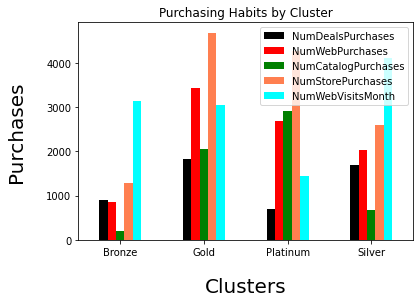

In [47]:
cluster_purchases = customer.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

plt.figure(figsize=(30,15))
cluster_purchases.plot(kind='bar', color=['black', 'red', 'green', 'coral', 'cyan'])

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

Insights:
- Pembelian produk dengan datang ke Store langsung paling banyak di lakukan oleh cluster Gold
- Jumlah pembelian produk melalui Catalog paling rendah ada di cluster Bronze
- Mayoritas pembelian produk melalui Web dan Catalog dilakukan oleh cluster Gold dan Platinum
- 

<Figure size 2160x1080 with 0 Axes>

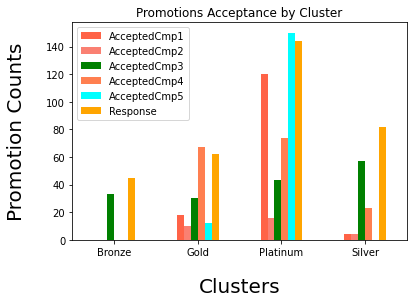

In [48]:
cluster_campaign = customer.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()

plt.figure(figsize=(30,15))
cluster_campaign.plot(kind='bar', color=['tomato', 'salmon', 'green', 'coral', 'cyan', 'orange'])

plt.title('Promotions Acceptance by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

Insights:
- Para pelanggan Platinum dan Gold menerima setiap penawaran yang perusahaan berikan
- Cluster Bronze kurang tertarik dengan promosi dan penawaran-penawaran yang perusahaan berikan

### KESIMPULAN
- Mayoritas customer telah lulus dari universitas, hidup dengan pasangannya, mempunyai satu anak dan rata-rata pendapatannya antara $25.000 sampai dengan $85.000
- Customer yang tidak mempunyai anak dan yang masih Single pengeluarannya ternyata lebih besar dibandingkan yang memiliki anak dan yang hidup dengan pasangannya
- Produk Wine dan Meat merupakan produk yang sangat banyak dibeli oleh para customer
- Customer yang memiliki pendapatan tinggi ternyata pengeluarannya juga besar
- Mayoritas Customer lebih suka membeli produk dengan langsung datang ke Store dan lewat website perusahaan
- Platinum Customer lebih menunjukan ketertarikannya terhadap promosi yang dilakukan oleh perusahaan sementara itu Bronze Customer tidak tertarik dengan promosi yang di berikan oleh perusahaan

1. Bagaimana karakteristik pelanggan?
   Pelanggan perusahaan mayoritas sudah menikah. Mereka merupakan kelompok Middle Age Adults, yang dimana usianya antara 40 sampai 60 tahun dan memiliki satu anak. Mayoritas mempunyai gelar sarjana S1 dan pendapatannya mencapai $25.000 sampai dengan $85.000

2. Bagaimana kebiasaan berbelanja pelanggan? 
   Pelanggan banyak menghabiskan uangnya ke jenis produk Wine dan Meat. Mereka yang tidak memilik anak memiliki pengeluaran yang lebih banyak dibandingkan yang memiliki anak. Middle aged adults pengeluarannya lebih bannyak dibandingkan kelompok grup yang lain. Belanja melalui toko merupakan pilihan dari banyak pelanggan. Pembelian melalui Web dan Catalog juga memiliki potensial yang bagus karena presentase belanjanya tinggi.

3. Apakah ada produk dari perusahaan yang membutuhkan lebih banyak pemasaran?
   Produk Sweet dan Fruits memerlukan pemasaran yang lebih efektif lagi karena kurangnya minat customer untuk membeli produk tersebut. Perusahaan harus lebih mempromosikan produk tersebut agar pendapatan perusahaan dapat meningkat. Rekomendasi saya mungkin dapat diberlakukan potongan harga setiap pembelian produk tersebut.

4. Bagaimana pemasaran yang efektif untuk perusahaan?
   Sebagai rekomendasi pemasaran, berikan kupon belanja kepada pelanggan lama dan pelanggan yang berbelanja dengan jumlah yang besar. Untuk produk-produk yang harganya murah bisa di promosikan ke pelanggan yang pendapatannya rendah agar mereka memiliki minat dan masih mampu untuk membeli produk tersebut. Dikarenakan pembelian melalui web memiliki potesial yang besar, maka sebaiknya berikan potongan harga khusus kepada pelanggan yang mendaftar lewat situs perusahaan
   